In [ ]:
# Load the data
data <- read.csv("trendline data.csv")

# Display structure
str(data)
head(data)

'data.frame':	36 obs. of  8 variables:
 $ Data       : chr  "ANC IPT 1 Coverage" "ANC IPT 1 Coverage" "ANC IPT 1 Coverage" "ANC IPT 1 Coverage" ...
 $ Period     : chr  "January 2024" "February 2024" "March 2024" "April 2024" ...
 $ Value      : num  110 114 107 110 129 ...
 $ Numerator  : num  22041 21494 23441 20476 38032 ...
 $ Denominator: num  20026 18786 21877 18576 29461 ...
 $ Factor     : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Multiplier : int  100 100 100 100 100 100 100 100 100 100 ...
 $ Divisor    : int  1 1 1 1 1 1 1 1 1 1 ...


,Data,Period,Value,Numerator,Denominator,Factor,Multiplier,Divisor
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,ANC IPT 1 Coverage,January 2024,110.06,22041,20026,100,100,1
2,ANC IPT 1 Coverage,February 2024,114.41,21494,18786,100,100,1
3,ANC IPT 1 Coverage,March 2024,107.15,23441,21877,100,100,1
4,ANC IPT 1 Coverage,April 2024,110.23,20476,18576,100,100,1
5,ANC IPT 1 Coverage,May 2024,129.09,38032,29461,100,100,1
6,ANC IPT 1 Coverage,June 2024,109.13,25988,23813,100,100,1


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



ANC IPT 1 Coverage Data Points: 18 
ANC IPT 2 Coverage Data Points: 18 

LINEAR REGRESSION RESULTS (Least Squares Method)

ANC IPT 1 Coverage Model:

Call:
lm(formula = Value ~ Period_Num, data = anc_ipt1)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.643  -4.757  -3.134   3.070  15.189 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 6.176e+01  2.352e+02   0.263    0.796
Period_Num  3.041e-08  1.363e-07   0.223    0.826

Residual standard error: 7.886 on 16 degrees of freedom
Multiple R-squared:  0.003103,	Adjusted R-squared:  -0.0592 
F-statistic: 0.04981 on 1 and 16 DF,  p-value: 0.8262



ANC IPT 2 Coverage Model:

Call:
lm(formula = Value ~ Period_Num, data = anc_ipt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.660 -10.338   1.335   5.307  25.555 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  3.500e+02  3.898e+02   0.898    0.383
Period_Num  -1.457e-07  2.258e-07  -0.645    0.528

Residual stand

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


ERROR: [1m[33mError[39m in `ggsave()`:[22m
[1m[22m[33m![39m Cannot find directory [34m/mnt/user-data/outputs[39m.
[36mℹ[39m Please supply an existing directory or use `create.dir = TRUE`.


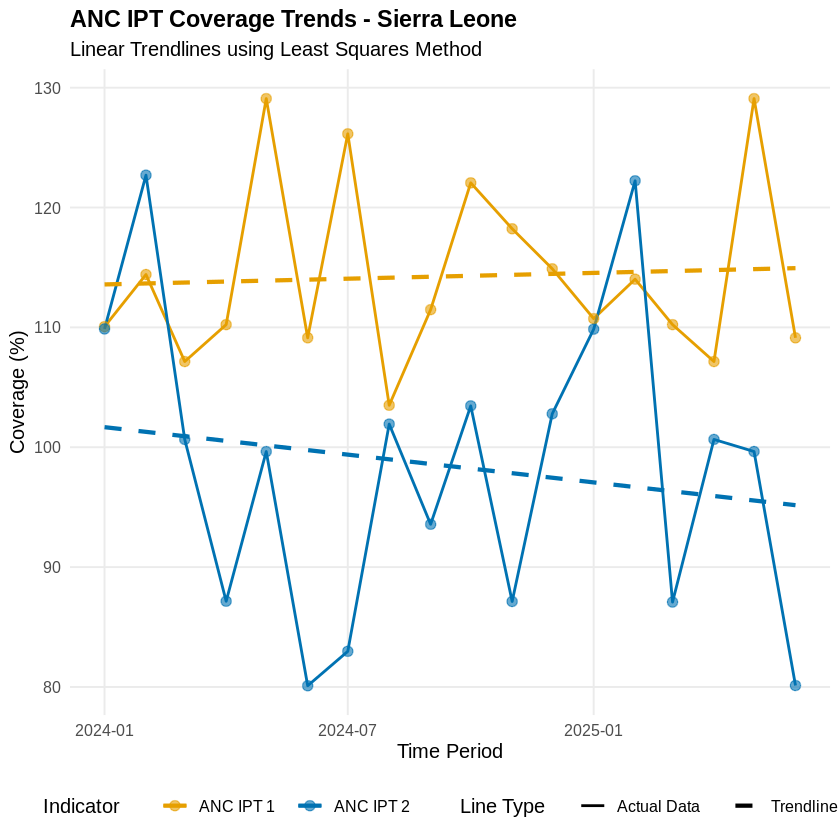

In [ ]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(lubridate)
install.packages("forecast") # Install the forecast package if not already installed
library(forecast)
library(tidyr)

# Create output directory if it doesn't exist
dir.create("/mnt/user-data/outputs", recursive = TRUE)

# Convert Period to proper date format
data$Date <- parse_date_time(data$Period, orders = "my")
data$Period_Num <- as.numeric(data$Date)  # Numeric for regression

# Separate ANC IPT 1 and ANC IPT 2
anc_ipt1 <- data %>% filter(Data == "ANC IPT 1 Coverage")
anc_ipt2 <- data %>% filter(Data == "ANC IPT 2 Coverage")

cat("ANC IPT 1 Coverage Data Points:", nrow(anc_ipt1), "\n")
cat("ANC IPT 2 Coverage Data Points:", nrow(anc_ipt2), "\n\n")

# ============================================================================
# PART 2: LINEAR REGRESSION (LEAST SQUARES METHOD)
# ============================================================================

# Fit linear models using least squares
model_ipt1 <- lm(Value ~ Period_Num, data = anc_ipt1)
model_ipt2 <- lm(Value ~ Period_Num, data = anc_ipt2)

cat("=" , rep("=", 70), "\n", sep="")
cat("LINEAR REGRESSION RESULTS (Least Squares Method)\n")
cat("=" , rep("=", 70), "\n", sep="")

cat("\nANC IPT 1 Coverage Model:\n")
print(summary(model_ipt1))

cat("\n\nANC IPT 2 Coverage Model:\n")
print(summary(model_ipt2))

# Extract coefficients
ipt1_intercept <- coef(model_ipt1)[1]
ipt1_slope <- coef(model_ipt1)[2]

ipt2_intercept <- coef(model_ipt2)[1]
ipt2_slope <- coef(model_ipt2)[2]

cat("\n" , rep("=", 70), "\n", sep="")
cat("TRENDLINE EQUATIONS:\n")
cat(rep("=", 70), "\n", sep="")
cat(sprintf("\nANC IPT 1: y = %.6f + %.6f * x\n", ipt1_intercept, ipt1_slope))
cat(sprintf("ANC IPT 2: y = %.6f + %.6f * x\n", ipt2_intercept, ipt2_slope))

# Interpret slopes
if (ipt1_slope > 0.001) {
  cat("\nANC IPT 1 Trend: Increasing (positive slope)\n")
} else if (ipt1_slope < -0.001) {
  cat("\nANC IPT 1 Trend: Decreasing (negative slope)\n")
} else {
  cat("\nANC IPT 1 Trend: Stable (near-zero slope)\n")
}

if (ipt2_slope > 0.001) {
  cat("ANC IPT 2 Trend: Increasing (positive slope)\n")
} else if (ipt2_slope < -0.001) {
  cat("ANC IPT 2 Trend: Decreasing (negative slope)\n")
} else {
  cat("ANC IPT 2 Trend: Stable (near-zero slope)\n")
}

# ============================================================================
# PART 3: FORECAST FUTURE VALUES (6 MONTHS AHEAD)
# ============================================================================

# Create future time periods for prediction
last_date <- max(anc_ipt1$Date)
future_dates <- seq(last_date, by = "month", length.out = 7)[-1]  # Next 6 months
future_period_num <- as.numeric(future_dates)

# Create data frame for predictions
future_data <- data.frame(
  Period_Num = future_period_num,
  Date = future_dates,
  Period = format(future_dates, "%B %Y")
)

# Predict future values
future_data$IPT1_Predicted <- predict(model_ipt1, newdata = future_data)
future_data$IPT2_Predicted <- predict(model_ipt2, newdata = future_data)

cat("\n", rep("=", 70), "\n", sep="")
cat("FORECASTED VALUES (Next 6 Months)\n")
cat(rep("=", 70), "\n", sep="")
print(future_data[, c("Period", "IPT1_Predicted", "IPT2_Predicted")])

# ============================================================================
# PART 4: FIND TRENDLINE INTERSECTION POINT
# ============================================================================

cat("\n", rep("=", 70), "\n", sep="")
cat("TRENDLINE INTERSECTION ANALYSIS\n")
cat(rep("=", 70), "\n", sep="")

# Calculate intersection point algebraically
# When: ipt1_intercept + ipt1_slope * x = ipt2_intercept + ipt2_slope * x
# Solve for x: x = (ipt2_intercept - ipt1_intercept) / (ipt1_slope - ipt2_slope)

slope_diff <- ipt1_slope - ipt2_slope

if (abs(slope_diff) < 1e-10) {
  cat("\nThe trendlines are PARALLEL (or nearly parallel).\n")
  cat("They will NOT intersect.\n")
  cat(sprintf("\nANC IPT 1 average level: %.2f%%\n", mean(anc_ipt1$Value)))
  cat(sprintf("ANC IPT 2 average level: %.2f%%\n", mean(anc_ipt2$Value)))
  cat(sprintf("Gap between trendlines: %.2f%%\n",
              mean(anc_ipt1$Value) - mean(anc_ipt2$Value)))
} else {
  # Calculate intersection
  x_intersect <- (ipt2_intercept - ipt1_intercept) / slope_diff
  y_intersect <- ipt1_intercept + ipt1_slope * x_intersect

  # Convert to date
  date_intersect <- as.POSIXct(x_intersect, origin = "1970-01-01")

  cat(sprintf("\nThe trendlines INTERSECT at:\n"))
  cat(sprintf("Date: %s\n", format(date_intersect, "%B %Y")))
  cat(sprintf("Coverage Value: %.2f%%\n", y_intersect))

  # Determine if past or future
  if (date_intersect < min(anc_ipt1$Date)) {
    cat("\nStatus: Intersection occurred BEFORE the observed period.\n")
  } else if (date_intersect > max(anc_ipt1$Date)) {
    cat("\nStatus: Intersection will occur in the FUTURE.\n")
  } else {
    cat("\nStatus: Intersection occurred DURING the observed period.\n")
  }
}

# ============================================================================
# PART 5: VISUALIZATIONS
# ============================================================================

cat("\n", rep("=", 70), "\n", sep="")
cat("CREATING VISUALIZATIONS...\n")
cat(rep("=", 70), "\n\n")

# Prepare data for plotting
plot_data <- bind_rows(
  anc_ipt1 %>% mutate(Type = "ANC IPT 1", Source = "Actual"),
  anc_ipt2 %>% mutate(Type = "ANC IPT 2", Source = "Actual")
)

# Add trendline predictions
plot_data$Trendline <- ifelse(
  plot_data$Type == "ANC IPT 1",
  predict(model_ipt1, newdata = plot_data),
  predict(model_ipt2, newdata = plot_data)
)

# Prepare forecast data for plotting
forecast_plot <- bind_rows(
  future_data %>%
    mutate(Type = "ANC IPT 1", Value = IPT1_Predicted, Source = "Forecast"),
  future_data %>%
    mutate(Type = "ANC IPT 2", Value = IPT2_Predicted, Source = "Forecast")
) %>% select(Date, Value, Type, Source, Period_Num)

# Combine actual and forecast
full_plot_data <- bind_rows(
  plot_data %>% select(Date, Value, Type, Source),
  forecast_plot %>% select(Date, Value, Type, Source)
)

# ============================================================================
# PLOT 1: Actual Data with Trendlines (Historical Period Only)
# ============================================================================

p1 <- ggplot() +
  # Actual data lines
  geom_line(data = plot_data,
            aes(x = Date, y = Value, color = Type, linetype = "Actual Data"),
            size = 0.8) +
  geom_point(data = plot_data,
             aes(x = Date, y = Value, color = Type),
             size = 2.5, alpha = 0.6) +
  # Trendlines
  geom_line(data = plot_data,
            aes(x = Date, y = Trendline, color = Type, linetype = "Trendline"),
            size = 1.2) +
  scale_color_manual(values = c("ANC IPT 1" = "#E69F00", "ANC IPT 2" = "#0072B2")) +
  scale_linetype_manual(values = c("Actual Data" = "solid", "Trendline" = "dashed")) +
  labs(title = "ANC IPT Coverage Trends - Sierra Leone",
       subtitle = "Linear Trendlines using Least Squares Method",
       x = "Time Period",
       y = "Coverage (%)",
       color = "Indicator",
       linetype = "Line Type") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "bottom",
    panel.grid.minor = element_blank()
  )

print(p1)
ggsave("/mnt/user-data/outputs/anc_ipt_trendlines_historical.png",
       p1, width = 12, height = 6, dpi = 300)

cat("✓ Saved: anc_ipt_trendlines_historical.png\n")

# ============================================================================
# PLOT 2: Extended Forecast with Projections
# ============================================================================

p2 <- ggplot() +
  # Historical actual data
  geom_line(data = plot_data,
            aes(x = Date, y = Value, color = Type),
            size = 0.8, alpha = 0.5) +
  geom_point(data = plot_data,
             aes(x = Date, y = Value, color = Type),
             size = 2, alpha = 0.4) +
  # Historical trendlines
  geom_line(data = plot_data,
            aes(x = Date, y = Trendline, color = Type),
            size = 1.2, linetype = "dashed") +
  # Forecasted values
  geom_line(data = forecast_plot,
            aes(x = Date, y = Value, color = Type),
            size = 1.2, linetype = "dotted") +
  geom_point(data = forecast_plot,
             aes(x = Date, y = Value, color = Type),
             size = 3, shape = 17) +
  # Add vertical line at forecast boundary
  geom_vline(xintercept = as.numeric(max(plot_data$Date)),
             linetype = "solid", color = "gray40", size = 0.5) +
  annotate("text", x = max(plot_data$Date), y = max(plot_data$Value) * 0.95,
           label = "Forecast →", hjust = -0.1, size = 3.5, color = "gray40") +
  scale_color_manual(values = c("ANC IPT 1" = "#E69F00", "ANC IPT 2" = "#0072B2")) +
  labs(title = "ANC IPT Coverage: Historical Trends and 6-Month Forecast",
       subtitle = "Dashed = Historical Trendline | Dotted = Projected Forecast",
       x = "Time Period",
       y = "Coverage (%)",
       color = "Indicator") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "bottom",
    panel.grid.minor = element_blank()
  )

print(p2)
ggsave("/mnt/user-data/outputs/anc_ipt_forecast_projection.png",
       p2, width = 12, height = 6, dpi = 300)

cat("✓ Saved: anc_ipt_forecast_projection.png\n")

# ============================================================================
# PLOT 3: Focused Intersection Analysis (if applicable)
# ============================================================================

if (abs(slope_diff) >= 1e-10) {
  # Extend time range to show intersection
  x_intersect <- (ipt2_intercept - ipt1_intercept) / slope_diff
  date_intersect <- as.POSIXct(x_intersect, origin = "1970-01-01")

  # Create extended range
  extended_dates <- seq(min(plot_data$Date),
                        max(date_intersect, max(forecast_plot$Date)) + months(3),
                        by = "month")
  extended_period_num <- as.numeric(extended_dates)

  extended_data <- data.frame(
    Date = extended_dates,
    Period_Num = extended_period_num,
    IPT1_Trend = predict(model_ipt1,
                         newdata = data.frame(Period_Num = extended_period_num)),
    IPT2_Trend = predict(model_ipt2,
                         newdata = data.frame(Period_Num = extended_period_num))
  )

  p3 <- ggplot() +
    # Extended trendlines
    geom_line(data = extended_data,
              aes(x = Date, y = IPT1_Trend, color = "ANC IPT 1"),
              size = 1.2) +
    geom_line(data = extended_data,
              aes(x = Date, y = IPT2_Trend, color = "ANC IPT 2"),
              size = 1.2) +
    # Historical actual data (for context)
    geom_point(data = plot_data,
               aes(x = Date, y = Value, color = Type),
               size = 2, alpha = 0.3) +
    # Mark intersection point
    geom_point(aes(x = date_intersect, y = y_intersect),
               color = "red", size = 5, shape = 4, stroke = 2) +
    annotate("text", x = date_intersect, y = y_intersect,
             label = sprintf("Intersection\n%s\n%.1f%%",
                           format(date_intersect, "%b %Y"), y_intersect),
             hjust = -0.1, vjust = 0, size = 3.5, color = "red") +
    # Mark forecast boundary
    geom_vline(xintercept = as.numeric(max(plot_data$Date)),
               linetype = "dashed", color = "gray40", size = 0.5) +
    scale_color_manual(values = c("ANC IPT 1" = "#E69F00", "ANC IPT 2" = "#0072B2")) +
    labs(title = "Trendline Intersection Analysis",
         subtitle = "Extended projection showing where trendlines meet",
         x = "Time Period",
         y = "Coverage (%)",
         color = "Indicator") +
    theme_minimal(base_size = 12) +
    theme(
      plot.title = element_text(face = "bold", size = 14),
      legend.position = "bottom",
      panel.grid.minor = element_blank()
    )

  print(p3)
  ggsave("/mnt/user-data/outputs/anc_ipt_intersection_analysis.png",
         p3, width = 12, height = 6, dpi = 300)

  cat("✓ Saved: anc_ipt_intersection_analysis.png\n")
}

# ============================================================================
# EXPORT RESULTS TO CSV
# ============================================================================

# Export forecast data
write.csv(future_data,
          "/mnt/user-data/outputs/anc_ipt_forecast.csv",
          row.names = FALSE)

cat("✓ Saved: anc_ipt_forecast.csv\n")

# Export model summary
model_summary <- data.frame(
  Indicator = c("ANC IPT 1", "ANC IPT 2"),
  Intercept = c(ipt1_intercept, ipt2_intercept),
  Slope = c(ipt1_slope, ipt2_slope),
  R_squared = c(summary(model_ipt1)$r.squared, summary(model_ipt2)$r.squared),
  Trend_Direction = c(
    ifelse(ipt1_slope > 0.001, "Increasing",
           ifelse(ipt1_slope < -0.001, "Decreasing", "Stable")),
    ifelse(ipt2_slope > 0.001, "Increasing",
           ifelse(ipt2_slope < -0.001, "Decreasing", "Stable"))
  )
)

write.csv(model_summary,
          "/mnt/user-data/outputs/anc_ipt_model_summary.csv",
          row.names = FALSE)

cat("✓ Saved: anc_ipt_model_summary.csv\n")

cat("\n", rep("=", 70), "\n", sep="")
cat("ANALYSIS COMPLETE!\n")
cat(rep("=", 70), "\n", sep="")
cat("\nAll outputs saved to: /mnt/user-data/outputs/\n")
cat("\nFiles created:\n")
cat("  1. anc_ipt_trendlines_historical.png - Historical data with trendlines\n")
cat("  2. anc_ipt_forecast_projection.png - Extended 6-month forecast\n")
if (abs(slope_diff) >= 1e-10) {
  cat("  3. anc_ipt_intersection_analysis.png - Trendline intersection point\n")
}
cat("  4. anc_ipt_forecast.csv - Forecasted values table\n")
cat("  5. anc_ipt_model_summary.csv - Regression model summary\n")

ANC IPT 1 Model:

Call:
lm(formula = Value ~ Period_Num, data = anc_ipt1)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.643  -4.757  -3.134   3.070  15.189 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 6.176e+01  2.352e+02   0.263    0.796
Period_Num  3.041e-08  1.363e-07   0.223    0.826

Residual standard error: 7.886 on 16 degrees of freedom
Multiple R-squared:  0.003103,	Adjusted R-squared:  -0.0592 
F-statistic: 0.04981 on 1 and 16 DF,  p-value: 0.8262



ANC IPT 2 Model:

Call:
lm(formula = Value ~ Period_Num, data = anc_ipt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.660 -10.338   1.335   5.307  25.555 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  3.500e+02  3.898e+02   0.898    0.383
Period_Num  -1.457e-07  2.258e-07  -0.645    0.528

Residual standard error: 13.07 on 16 degrees of freedom
Multiple R-squared:  0.02537,	Adjusted R-squared:  -0.03554 
F-statistic: 0.4165 on 1 and 16 DF,  p

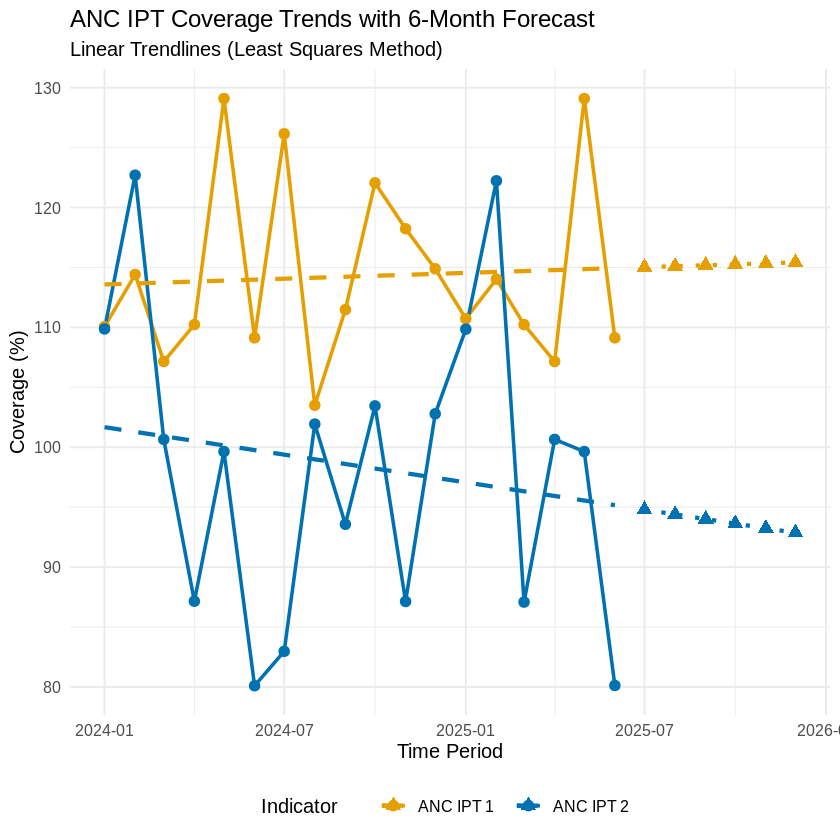

In [ ]:
# ============================================================================
# Simple ANC IPT Trendline Forecasting in R
# ============================================================================

# Load required libraries
library(ggplot2)
library(dplyr)
library(lubridate)

# Read the data
data <- read.csv("trendline data.csv")

# Convert Period to date and create numeric time variable
data$Date <- parse_date_time(data$Period, orders = "my")
data$Period_Num <- as.numeric(data$Date)

# Separate the two indicators
anc_ipt1 <- data %>% filter(Data == "ANC IPT 1 Coverage")
anc_ipt2 <- data %>% filter(Data == "ANC IPT 2 Coverage")

# ============================================================================
# Fit Linear Models (Least Squares Method)
# ============================================================================

model_ipt1 <- lm(Value ~ Period_Num, data = anc_ipt1)
model_ipt2 <- lm(Value ~ Period_Num, data = anc_ipt2)

# Print model summaries
cat("ANC IPT 1 Model:\n")
print(summary(model_ipt1))

cat("\n\nANC IPT 2 Model:\n")
print(summary(model_ipt2))

# ============================================================================
# Forecast 6 Months Ahead
# ============================================================================

# Create future dates
last_date <- max(anc_ipt1$Date)
future_dates <- seq(last_date, by = "month", length.out = 7)[-1]  # Next 6 months
future_period_num <- as.numeric(future_dates)

# Create forecast dataframe
forecast_df <- data.frame(
  Period_Num = future_period_num,
  Date = future_dates,
  Month = format(future_dates, "%B %Y")
)

# Predict future values
forecast_df$IPT1_Forecast <- predict(model_ipt1, newdata = forecast_df)
forecast_df$IPT2_Forecast <- predict(model_ipt2, newdata = forecast_df)

# Display forecast
cat("\n\nFORECASTED VALUES:\n")
print(forecast_df[, c("Month", "IPT1_Forecast", "IPT2_Forecast")])

# ============================================================================
# Find Trendline Intersection
# ============================================================================

slope_diff <- coef(model_ipt1)[2] - coef(model_ipt2)[2]

if (abs(slope_diff) < 1e-10) {
  cat("\n\nTrendlines are PARALLEL - they do not intersect.\n")
} else {
  # Calculate intersection point
  x_intersect <- (coef(model_ipt2)[1] - coef(model_ipt1)[1]) / slope_diff
  y_intersect <- coef(model_ipt1)[1] + coef(model_ipt1)[2] * x_intersect
  date_intersect <- as.POSIXct(x_intersect, origin = "1970-01-01")

  cat("\n\nTRENDLINE INTERSECTION:\n")
  cat(sprintf("Date: %s\n", format(date_intersect, "%B %Y")))
  cat(sprintf("Coverage: %.2f%%\n", y_intersect))
}

# ============================================================================
# Visualization
# ============================================================================

# Combine data for plotting
plot_data <- bind_rows(
  anc_ipt1 %>% mutate(Indicator = "ANC IPT 1"),
  anc_ipt2 %>% mutate(Indicator = "ANC IPT 2")
)

# Add trendline values
plot_data$Trendline <- ifelse(
  plot_data$Indicator == "ANC IPT 1",
  predict(model_ipt1, newdata = plot_data),
  predict(model_ipt2, newdata = plot_data)
)

# Prepare forecast for plotting
forecast_long <- bind_rows(
  forecast_df %>% mutate(Indicator = "ANC IPT 1", Value = IPT1_Forecast),
  forecast_df %>% mutate(Indicator = "ANC IPT 2", Value = IPT2_Forecast)
)

# Create plot
p <- ggplot() +
  # Historical actual data
  geom_line(data = plot_data,
            aes(x = Date, y = Value, color = Indicator),
            size = 1) +
  geom_point(data = plot_data,
             aes(x = Date, y = Value, color = Indicator),
             size = 2.5) +
  # Historical trendlines
  geom_line(data = plot_data,
            aes(x = Date, y = Trendline, color = Indicator),
            linetype = "dashed", size = 1.2) +
  # Forecast
  geom_line(data = forecast_long,
            aes(x = Date, y = Value, color = Indicator),
            linetype = "dotted", size = 1.2) +
  geom_point(data = forecast_long,
             aes(x = Date, y = Value, color = Indicator),
             shape = 17, size = 3) +
  # Styling
  scale_color_manual(values = c("ANC IPT 1" = "#E69F00", "ANC IPT 2" = "#0072B2")) +
  labs(title = "ANC IPT Coverage Trends with 6-Month Forecast",
       subtitle = "Linear Trendlines (Least Squares Method)",
       x = "Time Period",
       y = "Coverage (%)") +
  theme_minimal(base_size = 12) +
  theme(legend.position = "bottom")

print(p)

# Save plot
ggsave("../../Downloads/anc_ipt_trendline_forecast.png", p, width = 12, height = 6, dpi = 300)
cat("\n\nPlot saved as: anc_ipt_trendline_forecast.png\n")